In [ ]:
# default_exp trainers
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import FRED
from FRED.trainers import *
from FRED.trainers import Trainer
if torch.__version__[:4] == '1.13': # If using pytorch with MPS, use Apple silicon GPU acceleration
    device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.has_mps else "cpu")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)
%load_ext autoreload
%autoreload 2

Using device mps
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 04c01 Trainer: Flow Neighbor Loss and Diffusion Map Regularization
> A copy of FRED, tailored with particular loss functions

In [ ]:
# initialize model parameters and layers
from FRED.embed import ManifoldFlowEmbedder
from FRED.trainers import save_embedding_visualization, visualize_points
title = "Flow Neighbor Loss + Diffusion Map Reg"
MFE = ManifoldFlowEmbedder(
            embedding_dimension=2,
            embedder_shape=[3, 4, 8, 4, 2],
            device=device,
            sigma=0.5,
            flow_strength=0.5,
            smoothness_grid=True,
        )
loss_weights = {
            "reconstruction": 1,
            "diffusion map regularization": 1,
            "flow neighbor loss": 1e-3,
            "smoothness": 0,
        }
visualization_functions = [
    save_embedding_visualization,
    visualize_points
]
FREDtrainer = Trainer(FE = MFE, loss_weights=loss_weights, visualization_functions = visualization_functions, device=device, title = title)

# Testing on the Circle

Set sigma =  0.015164213


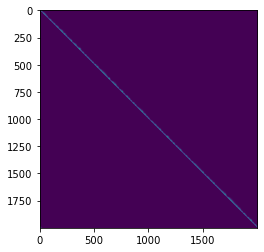

In [ ]:
from FRED.datasets import directed_circle
from FRED.data_processing import dataloader_from_ndarray
X, flow, labels = directed_circle(num_nodes=2000)
# build dataset
dataloader = dataloader_from_ndarray(X,flow,labels)

In [ ]:
FREDtrainer.fit(dataloader, n_epochs = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

X is on mps:0


NotImplementedError: The operator 'aten::index.Tensor_out' is not current implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [ ]:
d = {
    "X":torch.rand(40,40)
}

AttributeError: 'dict' object has no attribute 'to'